In [35]:
import pandas as pd
from pathlib import Path


INPUT_CSV = Path(r"data/train.csv")

# Tabel schema

In [36]:
df = pd.read_csv(INPUT_CSV)
print(df.dtypes)

id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object


# Check NaN

In [37]:
df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

### Procentowe wartosci w brakach

In [38]:
(df.isnull().sum() / len(df)) * 100

id                              0.000000
Podcast_Name                    0.000000
Episode_Title                   0.000000
Episode_Length_minutes         11.612400
Genre                           0.000000
Host_Popularity_percentage      0.000000
Publication_Day                 0.000000
Publication_Time                0.000000
Guest_Popularity_percentage    19.470667
Number_of_Ads                   0.000133
Episode_Sentiment               0.000000
Listening_Time_minutes          0.000000
dtype: float64

### - Drop bomba na Number_of_Ads - za mało jest
### - Zamiana na mediane Episode_Length_minutes - odcinki mogą mieć rozkład skośny
### - Zamiana na srednia Guest_Popularity_percentage - popularność gościa może mieć symetryczny rozkład

In [39]:
df = df.dropna(subset=["Number_of_Ads"]) 
#ej a moze zamieniac je na 0 a nie wypierdzielac? - nie bo zawyzy RMSE Xd

df.fillna({
    "Episode_Length_minutes": df["Episode_Length_minutes"].median(),
    "Guest_Popularity_percentage": df["Guest_Popularity_percentage"].mean()
}, inplace=True)

print(df.isnull().sum())

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64


In [40]:
#normalizacja typow danych
df.select_dtypes(include="object").columns


Index(['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day',
       'Publication_Time', 'Episode_Sentiment'],
      dtype='object')

In [41]:
for col in df.select_dtypes(include="object").columns:
    try:
        pd.to_numeric(df[col])
        print(f"{col} wygląda na numeryczną")
    except:
        print(f"{col} to string")


Podcast_Name to string
Episode_Title to string
Genre to string
Publication_Day to string
Publication_Time to string
Episode_Sentiment to string


In [42]:
#dobra ale jak wygladaja wiersze z typem danych object?

object_cols = df.select_dtypes(include=["object"]).columns

df[object_cols]

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
0,Mystery Matters,Episode 98,True Crime,Thursday,Night,Positive
1,Joke Junction,Episode 26,Comedy,Saturday,Afternoon,Negative
2,Study Sessions,Episode 16,Education,Tuesday,Evening,Negative
3,Digital Digest,Episode 45,Technology,Monday,Morning,Positive
4,Mind & Body,Episode 86,Health,Monday,Afternoon,Neutral
...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,Education,Saturday,Morning,Negative
749996,Business Briefs,Episode 21,Business,Saturday,Night,Neutral
749997,Lifestyle Lounge,Episode 51,Lifestyle,Thursday,Morning,Negative
749998,Style Guide,Episode 47,Lifestyle,Thursday,Morning,Negative


In [43]:
# for col in df.select_dtypes(include=["object", "string"]).columns:
#     df[col] = df[col].str.upper().str.strip()


In [44]:
#jak z typami danych w dataframe'ie?

df.dtypes

id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [45]:
# autogluon lubi stringi, nie object, zamieniamy ez

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype("string")

In [46]:
df.dtypes

id                                      int64
Podcast_Name                   string[python]
Episode_Title                  string[python]
Episode_Length_minutes                float64
Genre                          string[python]
Host_Popularity_percentage            float64
Publication_Day                string[python]
Publication_Time               string[python]
Guest_Popularity_percentage           float64
Number_of_Ads                         float64
Episode_Sentiment              string[python]
Listening_Time_minutes                float64
dtype: object

In [47]:
# # df.replace(["", "NA", "N/A", "None", "?", "nan"], pd.NA, inplace=True)
# # df.isna().sum()

# # W kolumnach kategorycznych lepiej zamienić NA na "MISSING", bo wtedy model może rozpoznać brakujące dane jako osobną, informacyjną kategorię zamiast je ignorować lub traktować jako null.
# # np random forest robi to z automatu ale nwm jak reszta tho

# missing_indicators = ["", "NA", "N/A", "None", "?", "nan"]
# print("Liczba wartości do zamiany na 'MISSING' w każdej kolumnie:")
# for col in df.columns:
#     count = df[col].isin(missing_indicators).sum()
#     print(f"{col}: {count}")
# df.replace(missing_indicators, "Missing", inplace=True)

### Oznaczenie flagą

In [48]:
# # Oznacza wszystkie wartości większe od 0 w nowej kolumnie jako 1
# # Przyda się później przy tym o czym napisałeś (że to niekoniecznie musi być błąd danych)
# df["is_listened"] = (df["Listening_Time_minutes"] > 0).astype(int)
# df_regression = df[df["is_listened"] == 1]


### Duplikaty

In [49]:
# Identyczne
dup_all = df.duplicated()
print(f"Duplikaty całkowite: {dup_all.sum()}")
df = df.drop_duplicates()

# Duplikaty wzgledem X (bez Y)
features = [c for c in df.columns if c != "Listening_Time_minutes"]
dup_same_x = df.duplicated(subset=features, keep=False)
print(f"Powtórzenia z tymi samymi X: {dup_same_x.sum()}")


Duplikaty całkowite: 0
Powtórzenia z tymi samymi X: 0


### Wartości w których nie odsluchano nic oznaczone 0 i te słuchane oznaczone 1

In [50]:
df["is_listened"].value_counts(dropna=False)


KeyError: 'is_listened'

In [51]:
df[df["is_listened"] != 1]


KeyError: 'is_listened'

Trochę dziwny jest ten dataset, bardzo mało czyszczenia

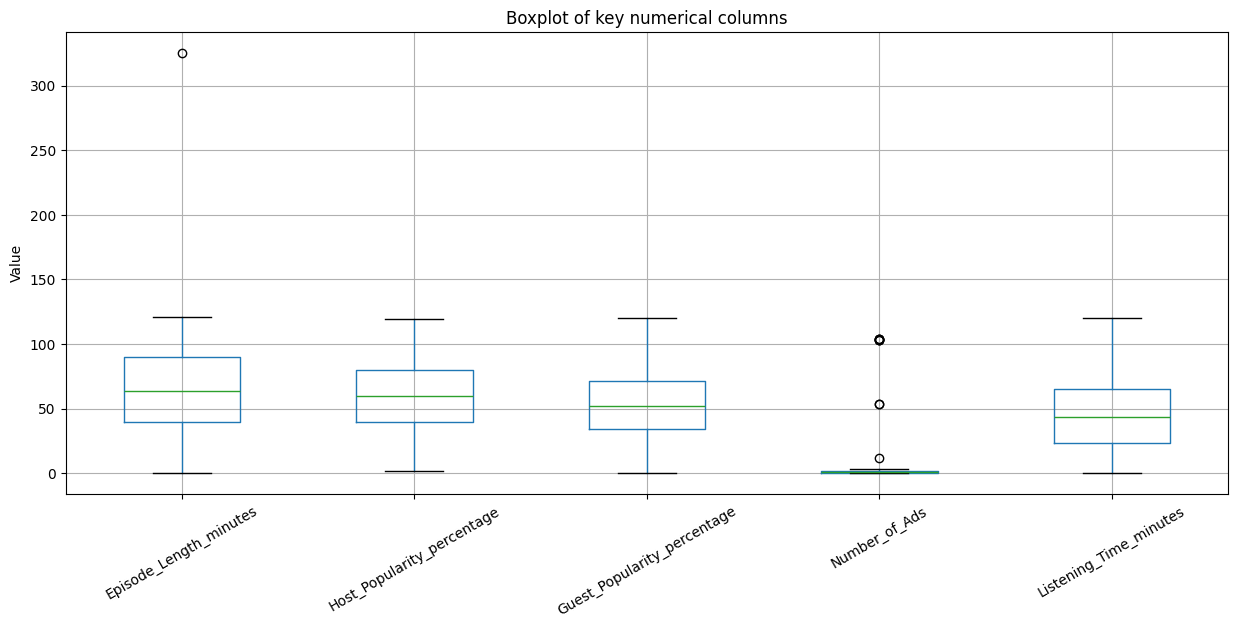

In [52]:
df
# czy są jakies outliery w Episode_Length_minutes, Host_Popularity_percentage, Guest_Popularity_percentage, Number_of_Ads, Listening_Time_minutes?

# narysuję fajny boxplot ez

import matplotlib.pyplot as plt

cols = [
    "Episode_Length_minutes",
    "Host_Popularity_percentage",
    "Guest_Popularity_percentage",
    "Number_of_Ads",
    "Listening_Time_minutes"
]

plt.figure(figsize=(15, 6))
df[cols].boxplot()
plt.title("Boxplot of key numerical columns")
plt.ylabel("Value")
plt.xticks(rotation=30)
plt.show()

In [53]:
# na jakim percentile leżą te outliery?

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    if not outliers.empty:
        min_outlier = outliers.min()
        max_outlier = outliers.max()
        min_percentile = (df[col] < min_outlier).mean() * 100
        max_percentile = (df[col] < max_outlier).mean() * 100
        print(f"{col}: outliers below {lower:.2f} (min={min_outlier}, centyl={min_percentile:.2f}%) "
              f"or above {upper:.2f} (max={max_outlier}, centyl={max_percentile:.2f}%)")
    else:
        print(f"{col}: brak outlierów wg IQR")

Episode_Length_minutes: outliers below -36.92 (min=325.24, centyl=100.00%) or above 166.65 (max=325.24, centyl=100.00%)
Host_Popularity_percentage: brak outlierów wg IQR
Guest_Popularity_percentage: brak outlierów wg IQR
Number_of_Ads: outliers below -3.00 (min=12.0, centyl=100.00%) or above 5.00 (max=103.91, centyl=100.00%)
Listening_Time_minutes: brak outlierów wg IQR


In [54]:
# Wyświetlenie outlierów dla wskazanych kolumn

# Episode_Length_minutes outliers
print("Outliery Episode_Length_minutes:")
q1 = df["Episode_Length_minutes"].quantile(0.25)
q3 = df["Episode_Length_minutes"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(df[(df["Episode_Length_minutes"] < lower) | (df["Episode_Length_minutes"] > upper)]["Episode_Length_minutes"])

# Number_of_Ads outliers
print("\nOutliery Number_of_Ads:")
q1 = df["Number_of_Ads"].quantile(0.25)
q3 = df["Number_of_Ads"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(df[(df["Number_of_Ads"] < lower) | (df["Number_of_Ads"] > upper)]["Number_of_Ads"])

Outliery Episode_Length_minutes:
101637    325.24
Name: Episode_Length_minutes, dtype: float64

Outliery Number_of_Ads:
211159     53.37
283606    103.91
436577    103.00
495919     53.42
537705    103.75
567235     12.00
602553    103.25
672139    103.25
683147    103.88
Name: Number_of_Ads, dtype: float64


In [55]:
median_num_ads = df["Number_of_Ads"].median()
print(f"Number of ads median: {median_num_ads}")

median_ep_len = df["Episode_Length_minutes"].median()
print(f"Episode Length minutes median: {median_ep_len}")


Number of ads median: 1.0
Episode Length minutes median: 63.84


In [56]:
# ej ja bym wywalil te outliery, jakies sus to jest, moze teorytycznie zawyzac RMSE modelu

# --- Definicja granic dla Episode_Length_minutes ---
ep_q1 = df["Episode_Length_minutes"].quantile(0.25)
ep_q3 = df["Episode_Length_minutes"].quantile(0.75)
ep_iqr = ep_q3 - ep_q1
ep_lower = ep_q1 - 1.5 * ep_iqr
ep_upper = ep_q3 + 1.5 * ep_iqr

# --- Definicja granic dla Number_of_Ads ---
ads_q1 = df["Number_of_Ads"].quantile(0.25)
ads_q3 = df["Number_of_Ads"].quantile(0.75)
ads_iqr = ads_q3 - ads_q1
ads_lower = ads_q1 - 1.5 * ads_iqr
ads_upper = ads_q3 + 1.5 * ads_iqr

# --- Tworzenie maski outlierów ---
outlier_mask = (
    (df["Episode_Length_minutes"] < ep_lower) | (df["Episode_Length_minutes"] > ep_upper) |
    (df["Number_of_Ads"] < ads_lower) | (df["Number_of_Ads"] > ads_upper)
)
outlier_mask = outlier_mask.fillna(False)  # zabezpieczenie przed NaN

print(f"Liczba outlierów do usunięcia: {outlier_mask.sum()}")

# --- Usunięcie outlierów ---
df_cleaned = df[~outlier_mask].copy()
print(f"Liczba wierszy po usunięciu outlierów: {len(df_cleaned)}")

Liczba outlierów do usunięcia: 10
Liczba wierszy po usunięciu outlierów: 749989


In [58]:
# zapisanie wyczyszczonego dataframu
df_cleaned.to_csv("data/train_cleaned.csv", index = False) #zapisywalem wczesniej wersje z outlierami Xd